In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mb = pd.read_csv('C:\\Users\\Kohnb\\OneDrive - Kantar\\Documents\\appstore_games.csv')
display(mb.head())

#let's do some basic data exploration
mb.info()
mb.isnull().sum()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

We're seeing over the half the values being null for Average User Rating and In-App Purchases. Based on the description of the data, User Rating Count is null if there's less than 5 ratings (which then results in Average User Rating being null as well). Addtionally, In-App Purchases will be null if the app doesn't offer in-app purchases.

Given these descriptions, the quality of the data set is fine, but I'm only interested in apps with over 5 ratings (those that have non-null User Rating Count values) becasue I think those variables will be neccessary for more interesting storytelling. Let's remove those null values.

In [3]:
#remove observations where we don't have User Rating Count information
mb = mb[~mb['User Rating Count'].isnull()]
mb.isnull().sum()

URL                                0
ID                                 0
Name                               0
Subtitle                        4837
Icon URL                           0
Average User Rating                0
User Rating Count                  0
Price                              0
In-app Purchases                2927
Description                        0
Developer                          0
Age Rating                         0
Languages                         24
Size                               0
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
dtype: int64

This is more workable. 

Subtitle has a lot of missing still. Could be that those apps simply don't have subtitles, so I'll leave it alone for now.

In-app Purchases is a list of values currently (0.99, 0.99, 1.99, 2.99, etc) which represents every possible in-app purchase. This would be more useful as a sum and/or count.

We can also calculate how long an app's been out using the Release Date columns.

In [4]:
#sum In-app Purchases into a new column

#first replace all Nan values with 0
mb['In-app Purchases'] = mb['In-app Purchases'].fillna('0')

from functools import reduce

#create function to split strings in In-app Purchases and sum the values
def collapse_func(data):
    data = str(data)
    return reduce(lambda x, y: x + y, [float(i) for i in data.split(',')])


mb['In-app Purchases Sum'] = mb['In-app Purchases'].apply(collapse_func)


#create function to split strings in In-app Purchases and count the values
def count_func(data):
    data = str(data)
    return len([float(i) for i in data.split(',')])


mb['In-app Purchases Count'] = mb['In-app Purchases'].apply(count_func)
display(mb[15:20])

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,In-app Purchases Sum,In-app Purchases Count
16,https://apps.apple.com/us/app/awele-oware-manc...,289217958,Awele/Oware - Mancala HD,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.0,112.0,0.00,0.99,Awele/Oware is the oldest African board game a...,SOLILAB,4+,"EN, FR, DE, IT, ES",122826752.0,Games,"Games, Strategy, Board",31/08/2008,6/04/2015,0.99,1
17,https://apps.apple.com/us/app/chess-game/id289...,289382458,Chess Game,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,3.0,504.0,0.00,0,"""How about a nice game of chess?"" -- Joshua, i...",Memention Holding AB,4+,EN,444163.0,Games,"Games, Board, Strategy",2/09/2008,7/10/2009,0.00,1
18,https://apps.apple.com/us/app/catcha-mouse/id2...,290493286,Catcha Mouse,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,95971.0,0.00,"1.99, 0.99, 1.99, 0.99, 4.99, 1.99, 1.99",*More than 4 Million downloads!!!\n\n#1 iPhone...,"Meme, Inc",4+,EN,26820692.0,Games,"Games, Puzzle, Strategy",19/02/2009,26/04/2013,14.93,7
19,https://apps.apple.com/us/app/cool-sudoku-jigs...,290614255,"Cool Sudoku, Jigsaw, Killer","Sudoku, Jigsaw, Killer, Kakuro",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.5,357.0,0.00,"0.99, 0.99, 0.99","You can now play Sudoku, Killer Sudoku, Jigsaw...",Splash Software Ltd.,4+,EN,52236288.0,Games,"Games, Strategy, Puzzle, Entertainment",24/09/2008,26/04/2019,2.97,3
20,https://apps.apple.com/us/app/mind-the-corners...,291074572,Mind the Corners,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,7.0,0.99,0,"""Mind the Corners is a board game where the go...",Zentropy Software,4+,EN,1530880.0,Games,"Games, Strategy, Entertainment, Board",19/09/2008,26/10/2016,0.00,1


In [5]:
#calcalate Age of App to show how long the app's been on the market

#covert to dateTime
mb['Original Release Date'] =  pd.to_datetime(mb['Original Release Date'])
mb['Current Version Release Date'] =  pd.to_datetime(mb['Current Version Release Date'])

#subtract original release date from the most recent 'Current Version'. This gives us the best approximation of the age of the
# app at time of data pull
mb['Age of App'] = (mb['Current Version Release Date'].max() - mb['Original Release Date']).dt.days
mb['Age of App'] /= 365
mb['Age of App'] = round((mb['Age of App']*2) / 2)

When we talk about what makes a "successful" mobile game, we could look at the number of downloads, the revenue from In-App payments, and/or the overall rating. The closest proxies we have in this dataset are the 'Average User Ratings' and 'User Rating Count'. With high values in each of those fields, we can say that app was both used and well regarded by many consumers.


Once we have the most successful apps, we can examine their other attributes and see what's important to stand out in this market.

,Name,User Rating Count
1378,Clash of Clans,3032734.0
7187,Clash Royale,1277095.0
13414,PUBG MOBILE,711409.0
1921,Plants vs. Zombies\u2122 2,469562.0
8139,Pok\xe9mon GO,439776.0
2410,Boom Beach,400787.0
12473,"Cash, Inc. Fame & Fortune Game",374772.0
8632,Idle Miner Tycoon: Cash Empire,283035.0
38,TapDefense,273687.0
3550,Star Wars\u2122: Commander,259030.0


,Name,Average User Rating
160,Slideswipe,5.0
185,King of Dragon Pass,5.0
210,ShotTacToe,5.0
251,Sync-Ball,5.0
275,WORP HD - Next Gen Solitaire Puzzle,5.0
288,"""Eric's FreeCell Solitaire Pack HD""",5.0
327,Magic Alchemist,5.0
370,Bomb Squad Patrol,5.0
510,DOFUS : Battles Lite,5.0
564,Anthill,5.0


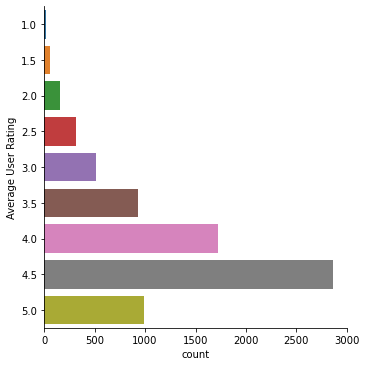

In [6]:
#take a look at the top 10 Apps by User Rating Count
display(mb.nlargest(10, 'User Rating Count')[['Name', 'User Rating Count']])
display(mb.nlargest(10, 'Average User Rating')[['Name', 'Average User Rating']])

#average user ratings are all 5, let's check the overall distribution of ratings
sns.catplot(y = 'Average User Rating', data=mb, kind='count')

Since this data set rounds the scores to the nearest 0.5, The top 10 Apps by 'Average User Rating' are all 5 stars, which makes it difficult to judge which app is really performing better than another by that metric. In fact, looking at the distribution, close to 1,000 Apps have a 'perfect' score. 

We'll combine these metrics to build one KPI, called 'Performance'. 

The actual ratios are up for debate, but in terms of generating revenue, it's probably more important for the game to have a large amount of ratings  (implying a large amount of downloads) than a high rating. So we'll use a 30/70 split.

As an aside, something to keep in mind when talking about performance, is that we don't have time series data depicting the current player base. The closest thing we have is User Rating Count serving as a proxy for Download Count. The issue is that this number is monotonically increasing (assuming users can't delete their review at any point in the future). This will skew the performance metric towards games that have been out longer since they've simply had more time to acquire users and ratings. We could try to address this by dividing the Performance metric by the amount of time the app's been out, but this could end up unfairly punishing apps that have a longer life span since we don't know if the rate of User Ratings is constant from year-to-year. In other words, maybe the bulk of User Ratings happen in the first eight months and then drop dramatically for the apps remaining life span. It's a complex question that this data isn't equipped to answer, so we'll leave it alone for now. 

,Name,Subtitle,Average User Rating,User Rating Count,Price,Primary Genre,Original Release Date,Current Version Release Date,In-app Purchases Sum,In-app Purchases Count,Age of App,Performance
1378,Clash of Clans,Build your empire,4.5,3032734.0,0.0,Games,2012-02-08,2019-06-20,199.90,10,8.0,1.000
7187,Clash Royale,Epic Real-Time Card Battles!,4.5,1277095.0,0.0,Games,2016-02-03,2019-01-08,77.90,10,4.0,0.421
13414,PUBG MOBILE,Team up! New 4v4 Mode is here,4.5,711409.0,0.0,Games,2018-03-19,2019-12-06,218.88,12,2.0,0.235
1921,Plants vs. Zombies\u2122 2,Save your brains!,4.5,469562.0,0.0,Games,2013-08-15,2019-07-29,49.90,10,6.0,0.155
8139,Pok\xe9mon GO,Discover Pok\xe9mon worldwide,3.5,439776.0,0.0,Games,2016-07-07,2019-02-08,175.94,6,3.0,0.145
2410,Boom Beach,Build. Plan. Boom!,4.5,400787.0,0.0,Games,2014-03-26,2019-03-07,198.92,8,6.0,0.132
12473,"Cash, Inc. Fame & Fortune Game",Fun Strategy Business Clicker!,5.0,374772.0,0.0,Games,2017-06-10,2019-12-07,109.90,10,2.0,0.124
8632,Idle Miner Tycoon: Cash Empire,Mining Manager: Clicker Games,4.5,283035.0,0.0,Games,2016-01-07,2019-07-31,83.90,10,4.0,0.093
38,TapDefense,NaN,3.5,273687.0,0.0,Games,2008-11-24,2012-05-12,5.97,3,11.0,0.090
3550,Star Wars\u2122: Commander,Base Building Strategy Game,4.5,259030.0,0.0,Games,2014-08-21,2019-07-18,252.90,10,5.0,0.085


<AxesSubplot:xlabel='Age of App', ylabel='count'>

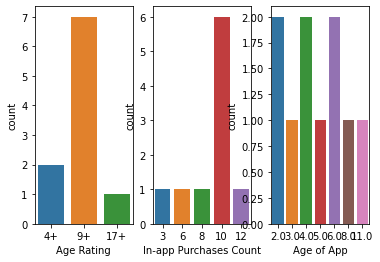

In [7]:
mb['Performance'] = (mb['Average User Rating'] * 0.3) + (mb['User Rating Count'] * 0.7)
mb['Performance'] = round(mb['Performance'] / (mb['Performance'].max()), 3)

top10Perf =  mb.nlargest(10, 'Performance')

display(top10Perf.iloc[:, [2,3,5,6,7,14,16,17,18,19,20,21]])

fig, axs = plt.subplots(ncols=3)
sns.countplot(x='Age Rating', data=top10Perf, order=['4+', '9+', '17+'], ax=axs[0])
sns.countplot(x='In-app Purchases Count', data=top10Perf, ax=axs[1])
sns.countplot(x='Age of App', data=top10Perf, ax=axs[2])

Looking at the top 10, it seems the 'Base Building/ Defense' sub-genre has a strong hold on the market and makes up half of this list. (Clash of Clans, PvZ, Boom Beach, Tap Defense, Star Wars: Commander). In most genres, there's one or two 'kings' that hold the majority of the player base, with a steady rotation of competitors trailing behind. (MOBA has League and DOTA, MMO has World of Warcraft, Battle Royale has Fortnite and Apex, etc.) We see a similar situation here, with Clash of Clans showing 600% more User Ratings than it's closest competitor. If one were to be developing games for the mobile market, it may be wise to steer away from this sub-genre.

And while it's common knowledge at this point, we can confirm that lower Age Ratings are common among top performing apps. The additions of mature content (gore, sexual themes, crude language) seem unnecessary and ill-fitted to the mobile space where the focus is historically on fun, addictive, casual gameplay.

These game all costing zero dollars is also no coincidence. When trying to penetrate the market, it's helpful to have zero barriers to entry. Players are more willing to download and experience a game when it costs them nothing to do so. This also helps when targeting players with low to no income (such as college students) as they can participate and play with their friends right away and potentially put money into the system later on. 

Finally, there's the distribution of In-App Purchases, which for the majority of these Apps, has offers ranging from 1 to 100 dollars. It's probably safe to say this isn't a causal relatioship. It's not that games with a larger quantity and more expensive in-app purchasing options perform better, it's that once Apps get to be top performers, they can roll out such options to entice big spenders. With a massive player base comes massive competition. With massive competition comes the drive to be the best. And the quickest way to do that is through microtransactions. When a player is very passionate and engaged with an app and already aligned to spend a lot of money on it, they're looking for the 'best deal'. Generally, the pricing schemes will be more efficient for the higher tiers of pricing. (Buying 100 gems costs 12% less than buying 10 gem, 10 times.)